# Exploratory Data Analysis

This notebook plays with the data, displaying different parts and different frames of the dances.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from matplotlib import animation
import pandas as pd
import c3d


In [2]:
# Read the file of one dance
reader = c3d.Reader(open('Clio_Haniotikos.c3d', 'rb'))

rows_list = []
for i, points, analog in reader.read_frames():
        dict1 = {}
        # get input row in dictionary format
        # key = col_name
        dict1.update({"Frame" : i, "Points" : points}) 
        rows_list.append(dict1)

df = pd.DataFrame(rows_list)    

/Users/elisamichelet/opt/anaconda3/lib/python3.8/site-packages/c3d.py:564: UserWarning: missing parameter ANALOG:LABELS
  warnings.warn('missing parameter {}'.format(name))
/Users/elisamichelet/opt/anaconda3/lib/python3.8/site-packages/c3d.py:564: UserWarning: missing parameter ANALOG:DESCRIPTIONS
  warnings.warn('missing parameter {}'.format(name))


In [4]:
# Displays the movements for chosen points
def plot_movement(file, point):
    reader = c3d.Reader(open(file, 'rb'))

    rows_list = []
    for i, points, analog in reader.read_frames():
        dict1 = {}
        dict1.update({"Frame" : i, "Points" : points}) 
        rows_list.append(dict1)

    df = pd.DataFrame(rows_list) 
    one_point = pd.DataFrame(df['Points']).stack().str[point].unstack()['Points']
    X = pd.DataFrame(one_point).stack().str[0].unstack()
    Y = pd.DataFrame(one_point).stack().str[1].unstack()
    Z = pd.DataFrame(one_point).stack().str[2].unstack()
    t = np.arange(len(X))
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, c=t)

In [104]:
# Plots one point in the graph
def plot_one_point(point, ax, c):
    X = pd.DataFrame(point).stack().str[0].unstack()
    Y = pd.DataFrame(point).stack().str[1].unstack()
    Z = pd.DataFrame(point).stack().str[2].unstack()
    t = np.arange(len(X))
    ax.scatter(X, Y, Z, c=c) # c=t

In [105]:
# plot movement and specify colors
def plot_movement_color(file, display_points, colors):
    reader = c3d.Reader(open(file, 'rb'))

    rows_list = []
    for i, points, analog in reader.read_frames():
        dict1 = {}
        dict1.update({"Frame" : i, "Points" : points}) 
        rows_list.append(dict1)
    
    df = pd.DataFrame(rows_list) 
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')

    for point, c in zip(display_points, colors):
        plot_one_point(pd.DataFrame(df['Points']).stack().str[point].unstack()['Points'], ax, c)
   


Now, let's try to plot some of the dances

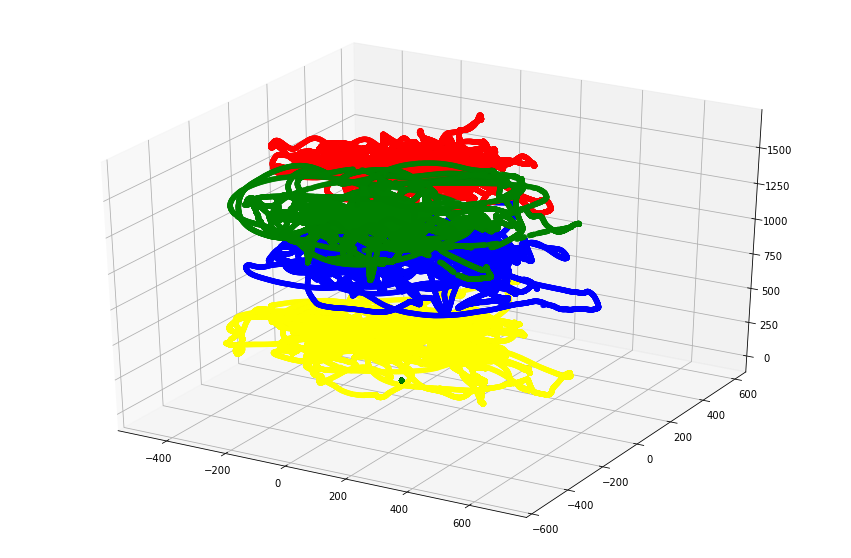

In [106]:
plot_movement_color('Clio_Haniotikos.c3d', [2, 8, 17, 26], ['red', 'blue', 'green', 'yellow'])

/Users/elisamichelet/opt/anaconda3/lib/python3.8/site-packages/c3d.py:564: UserWarning: missing parameter ANALOG:LABELS
  warnings.warn('missing parameter {}'.format(name))
/Users/elisamichelet/opt/anaconda3/lib/python3.8/site-packages/c3d.py:564: UserWarning: missing parameter ANALOG:DESCRIPTIONS
  warnings.warn('missing parameter {}'.format(name))


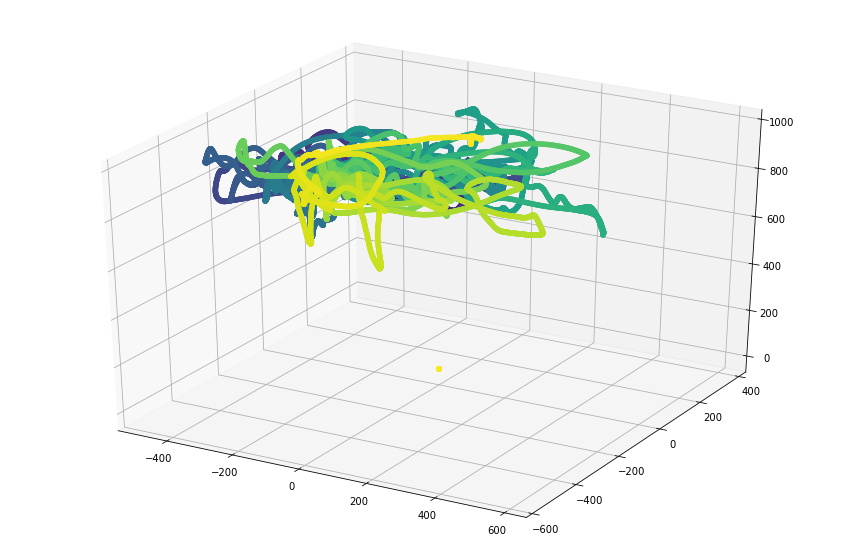

In [5]:
plot_movement('Clio_Haniotikos.c3d', 37)

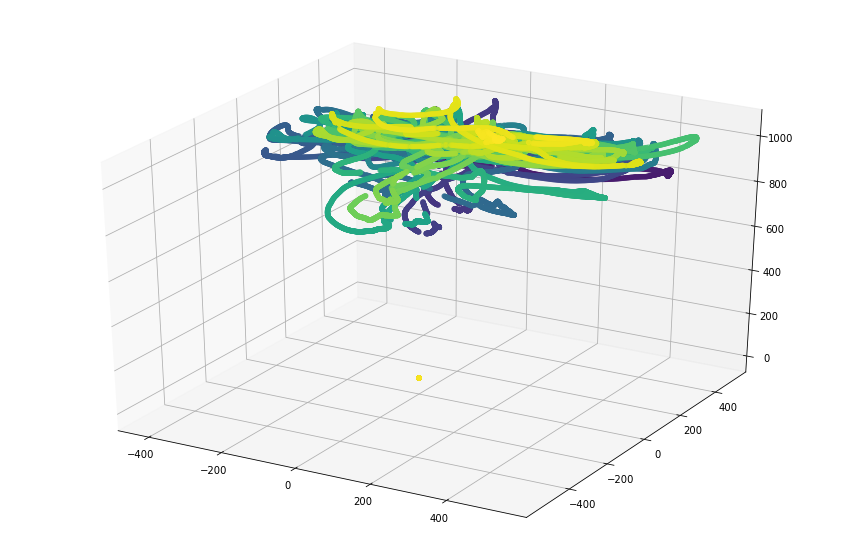

In [22]:
plot_movement('Stefanos_Bachata-01.c3d', 37)

In [34]:


# A list of all the joints
points_df = pd.DataFrame(['Site','LeftToeDase','LeftFoot',
                         'LeftLeg', 'LeftUpLeg', 'LHipJoint', 'Site', 'RightToeBase', 'RightFoot', 'RightLeg', 'RightUpLeg',
                         'RHipJoint', 'Site', 'Head', 'Neck1', 'Neck', 'Site', 'LeftHandIndex1', 'LeftFingerBase', 'Site', 'LThumb',
                         'LeftHand', 'LeftForeArm', 'LeftArm', 'LeftUpArm', 'Site', 'RightHandIndex1', 'RightFingerBase', 'Site', 'RThumb', 'RightHand',
                         'RightForeArm', 'RightArm', 'RightUpArm', 'Spine1', 'Spine', 'LowerBack', 'Hips'])
points_df.columns = {'BodyPart'}

In [77]:
points_df.head(36)

BodyPart
0              Site
1       LeftToeDase
2          LeftFoot
3           LeftLeg
4         LeftUpLeg
5         LHipJoint
6              Site
7      RightToeBase
8         RightFoot
9          RightLeg
10       RightUpLeg
11        RHipJoint
12             Site
13             Head
14            Neck1
15             Neck
16             Site
17   LeftHandIndex1
18   LeftFingerBase
19             Site
20           LThumb
21         LeftHand
22      LeftForeArm
23          LeftArm
24        LeftUpArm
25             Site
26  RightHandIndex1
27  RightFingerBase
28             Site
29           RThumb
30        RightHand
31     RightForeArm
32         RightArm
33       RightUpArm
34           Spine1
35            Spine

We can now plot the body part we want (the color changes in time).

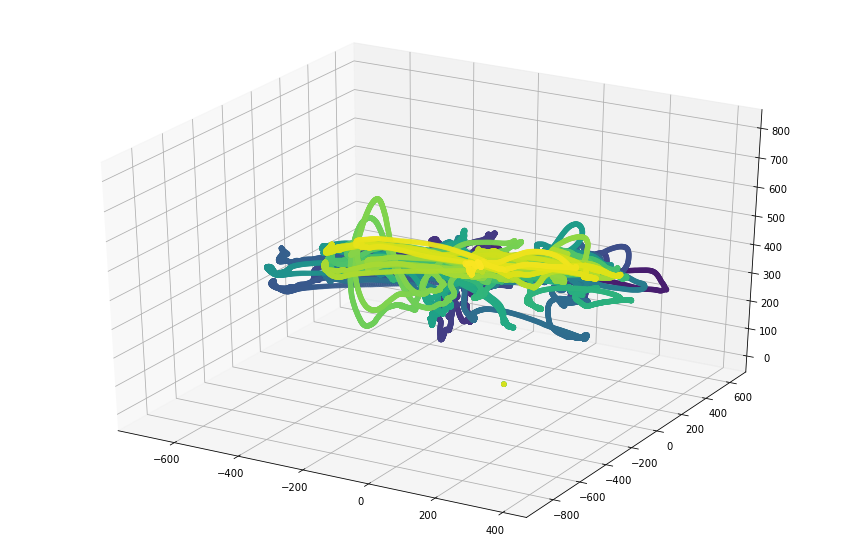

In [42]:
plot_movement('Stefanos_Bachata-01.c3d', points_df.index[points_df['BodyPart'] == 'RightHandIndex1'][0])

And different successive frames

<ipython-input-9-c02da7123b4d>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,10))


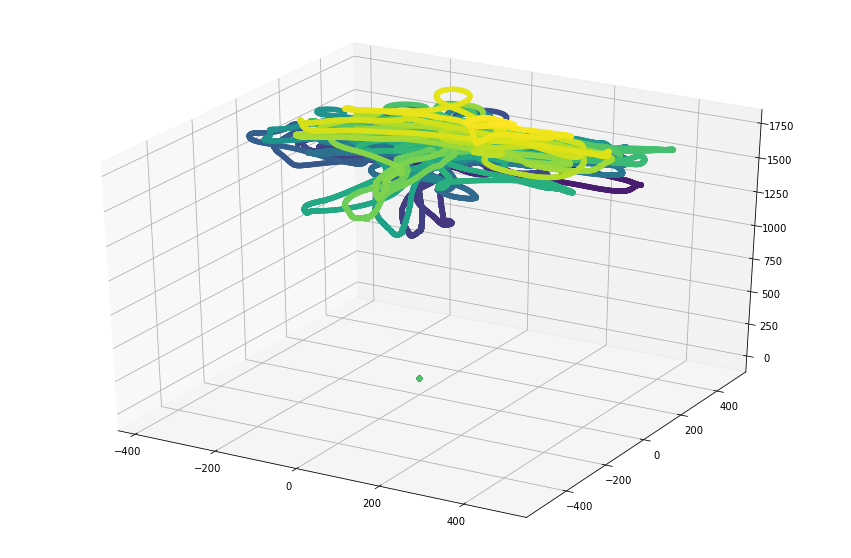

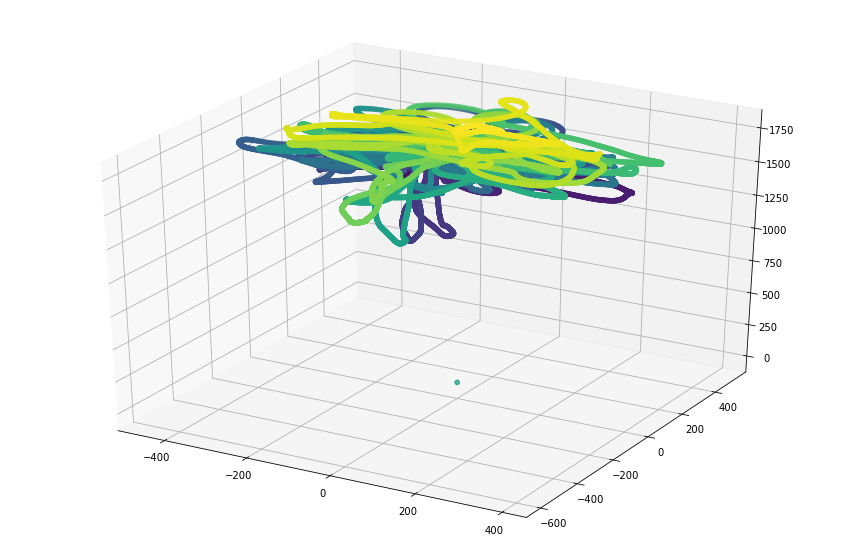

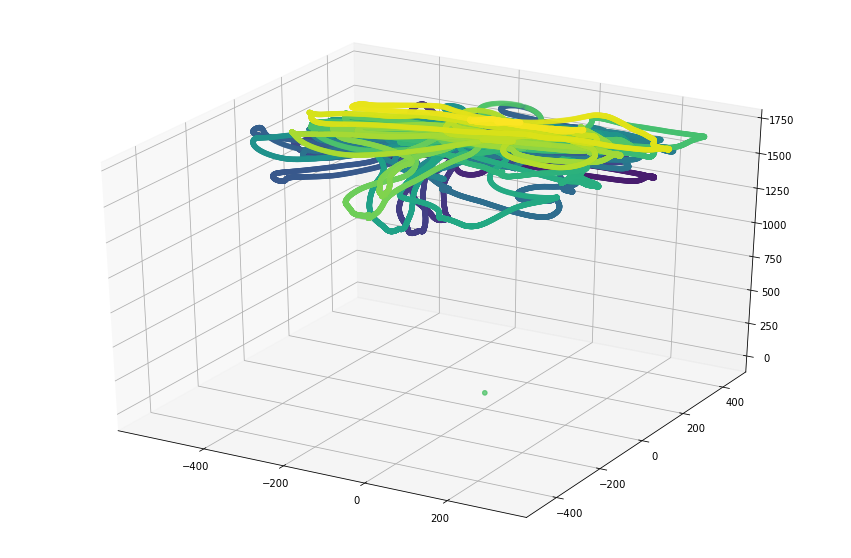

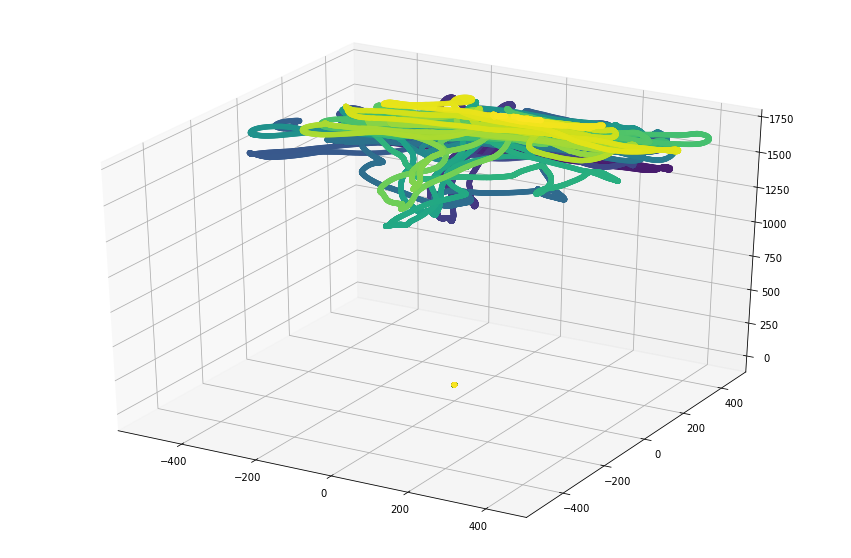

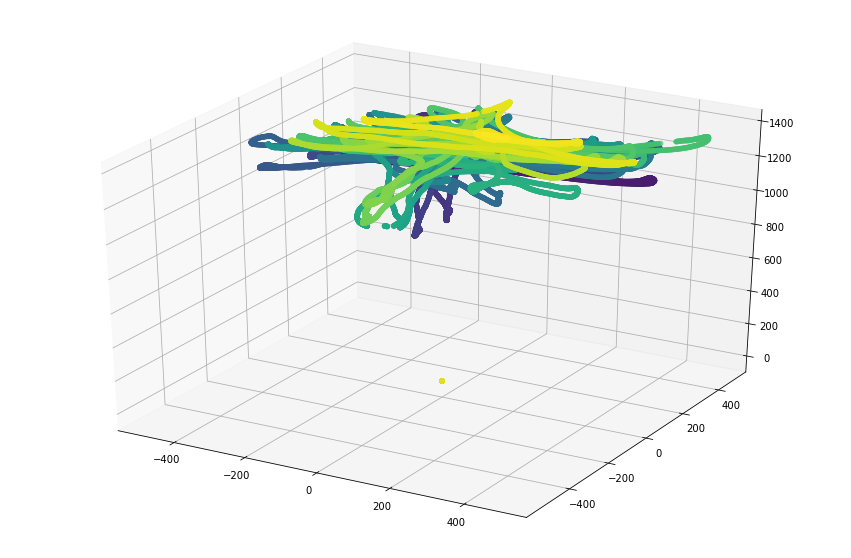

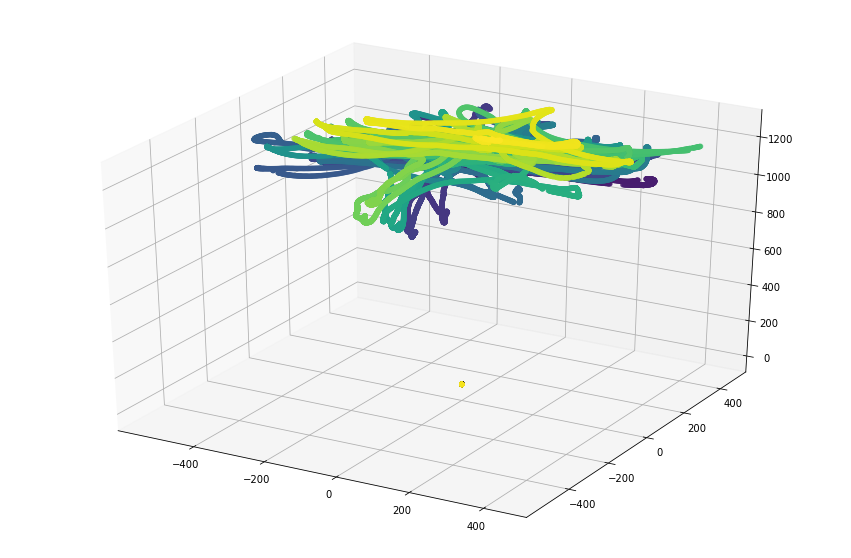

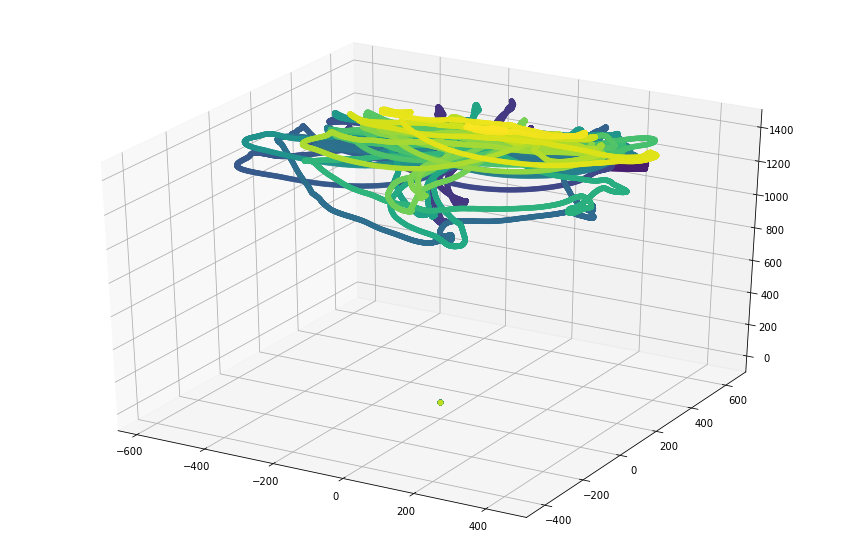

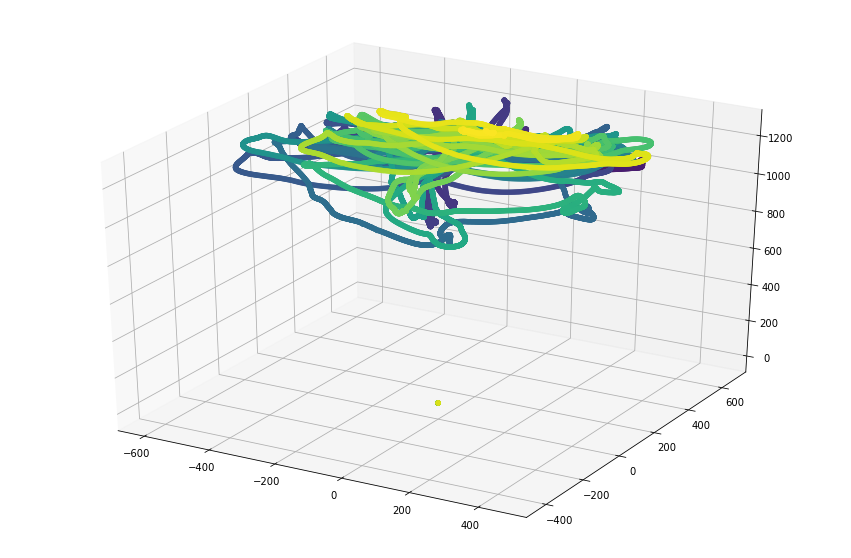

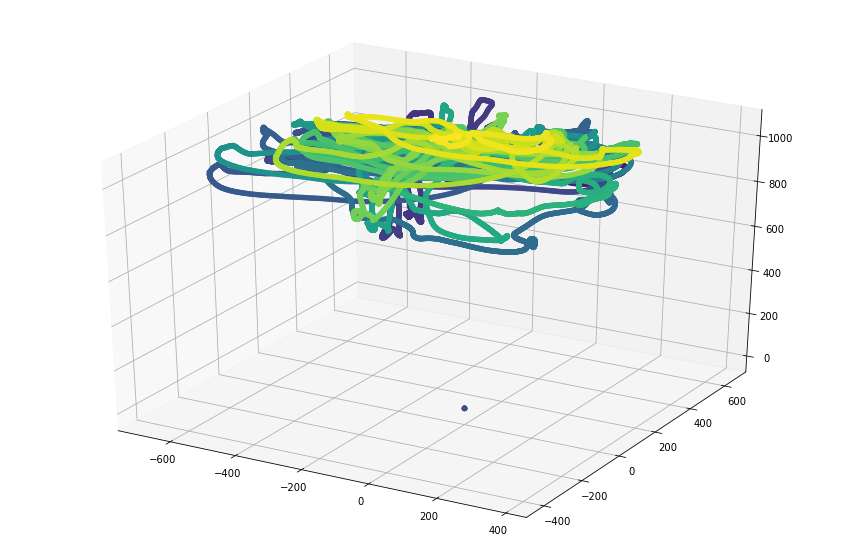

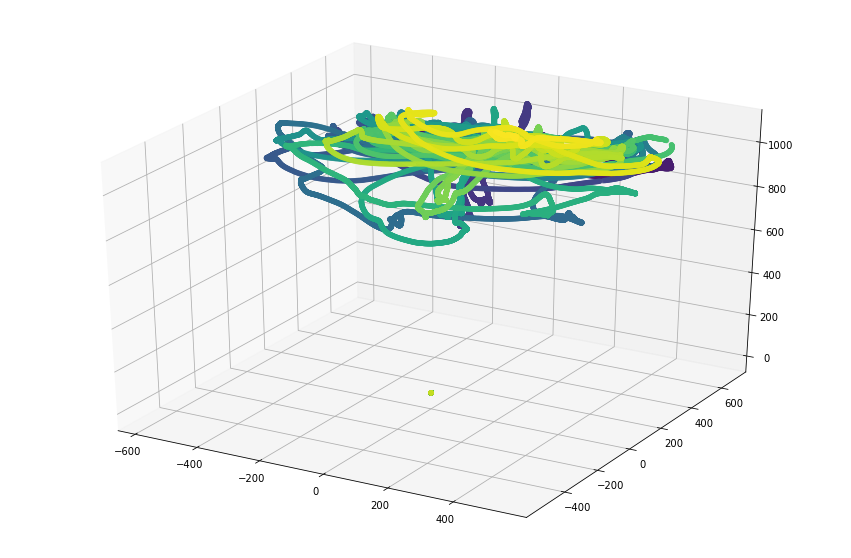

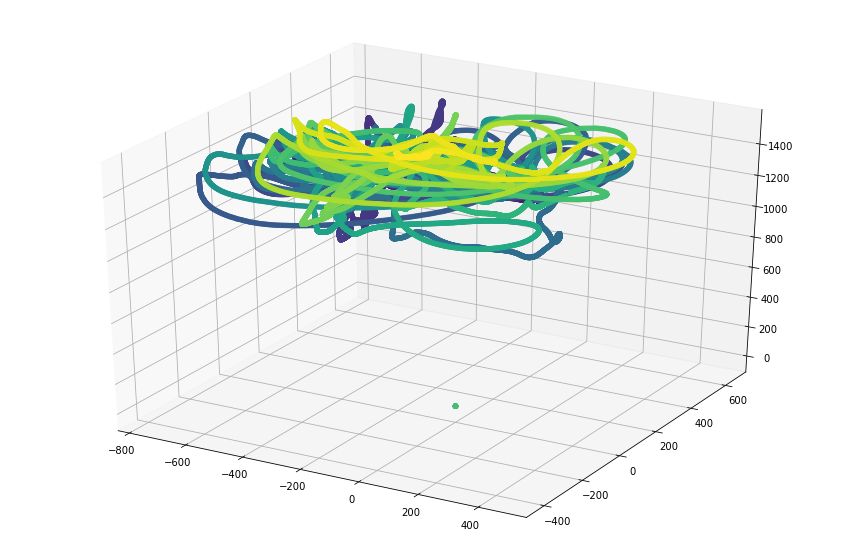

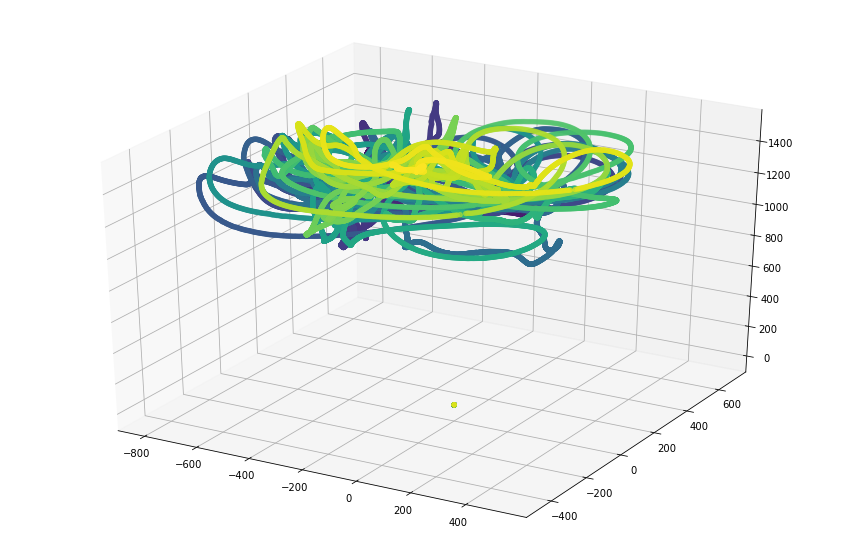

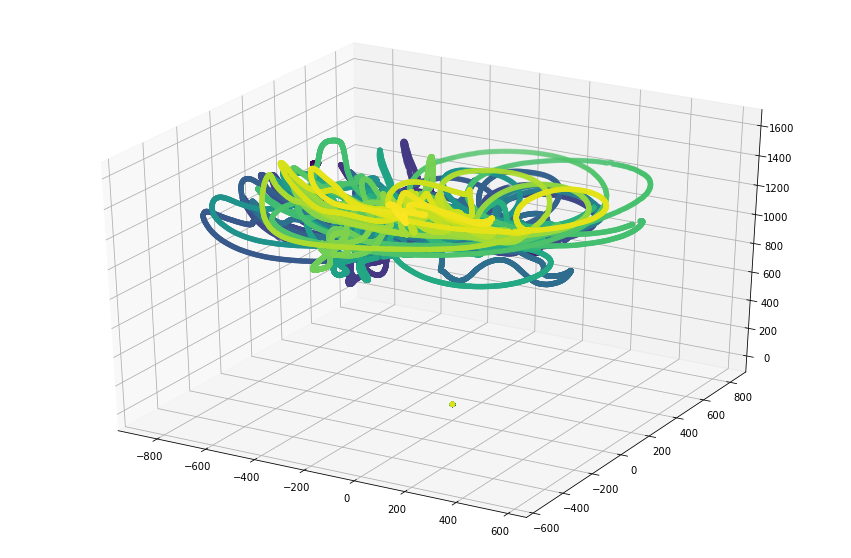

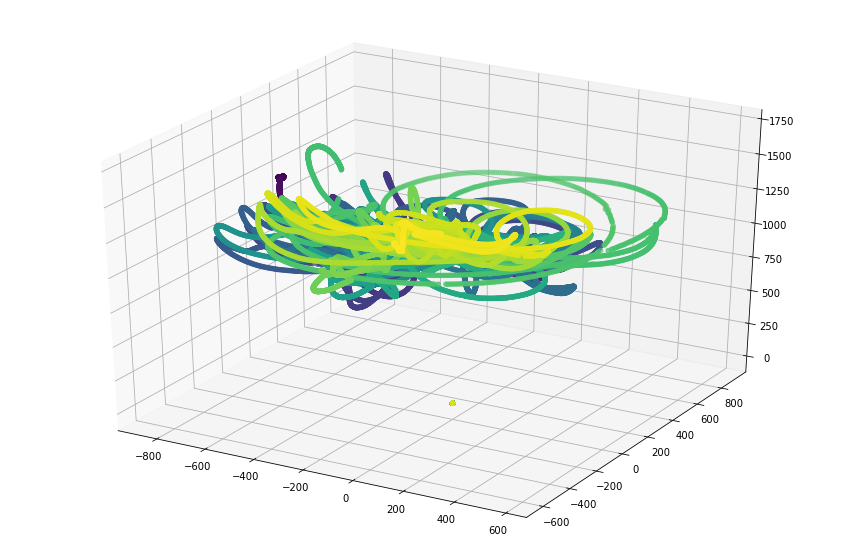

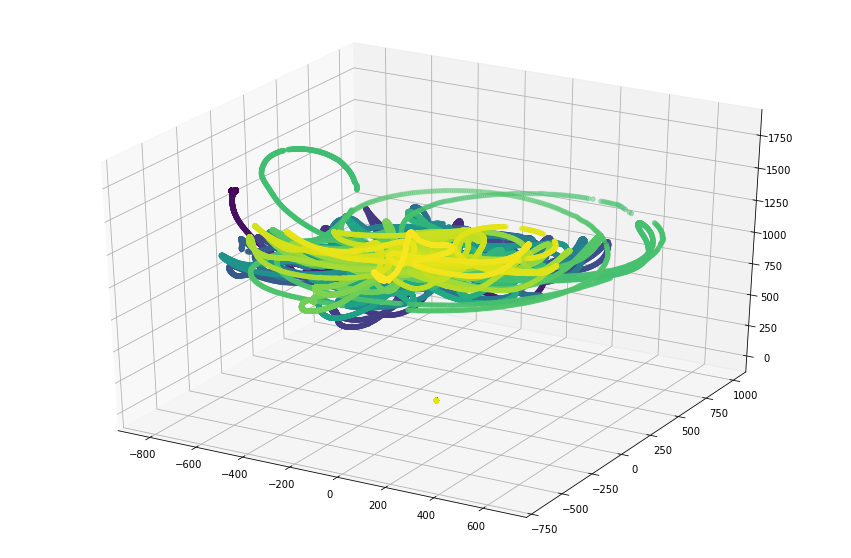

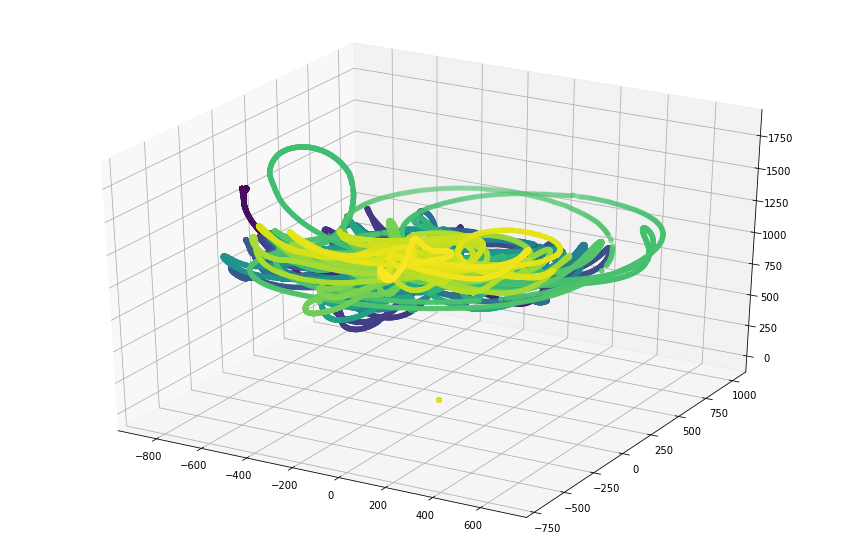

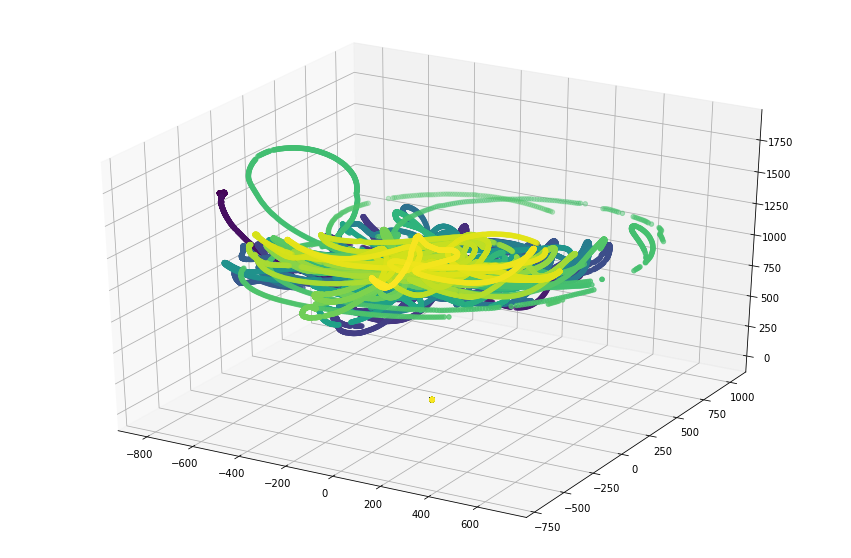

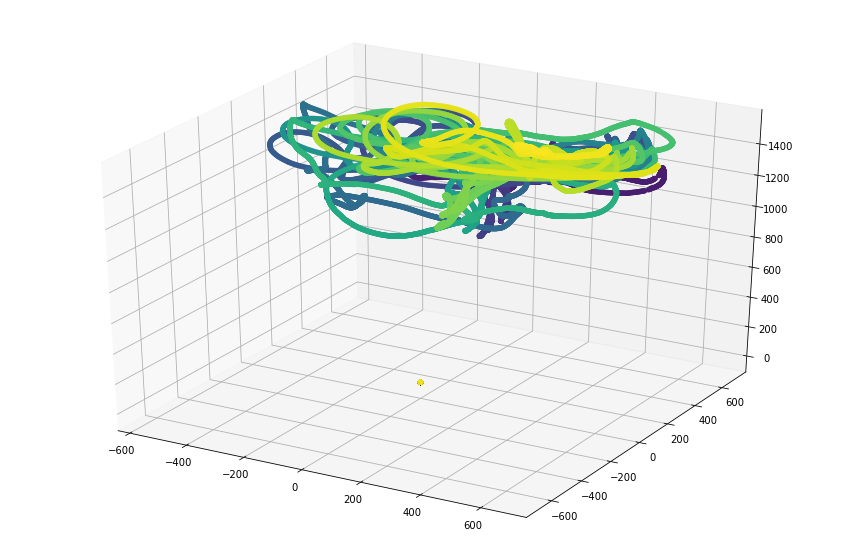

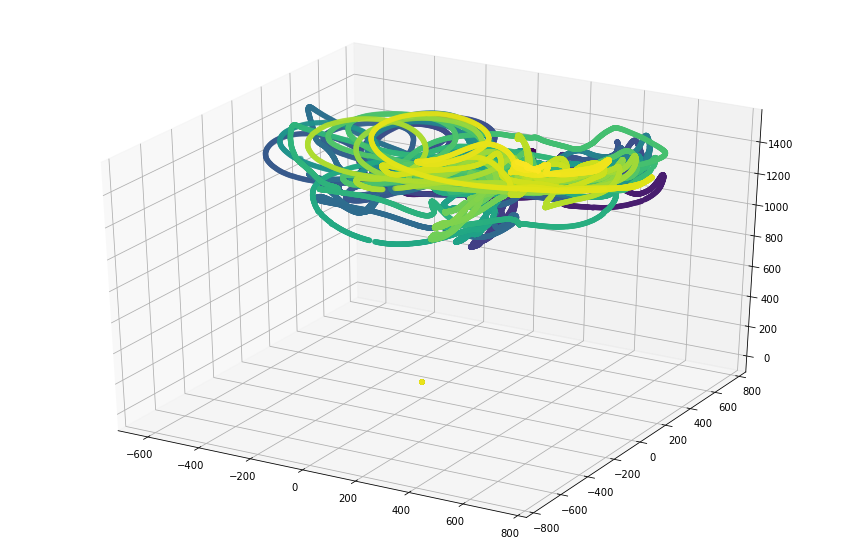

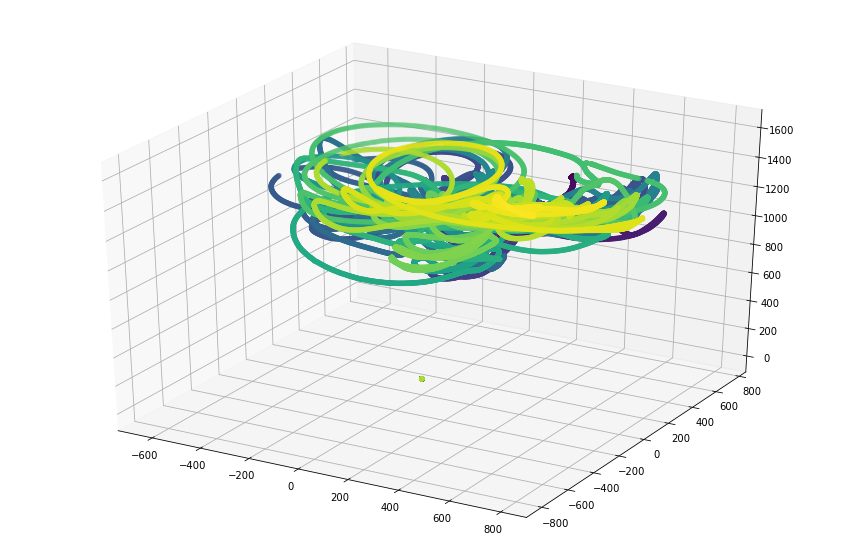

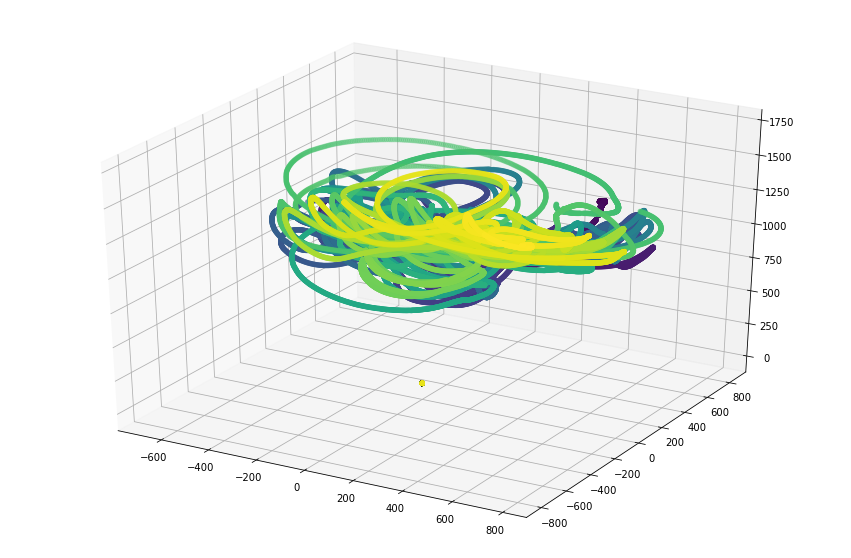

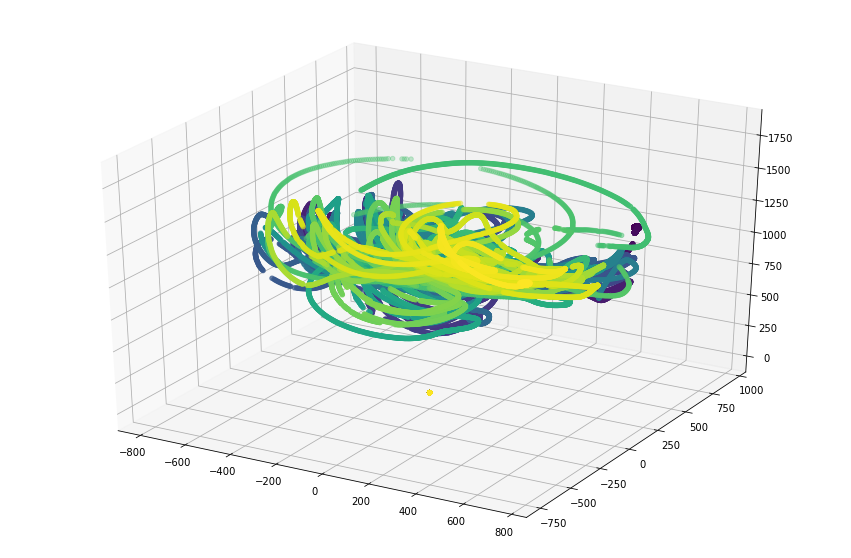

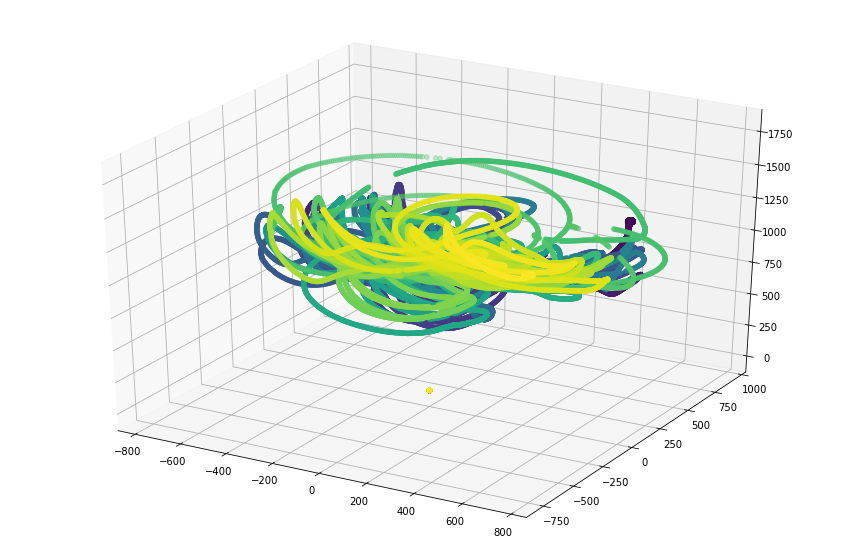

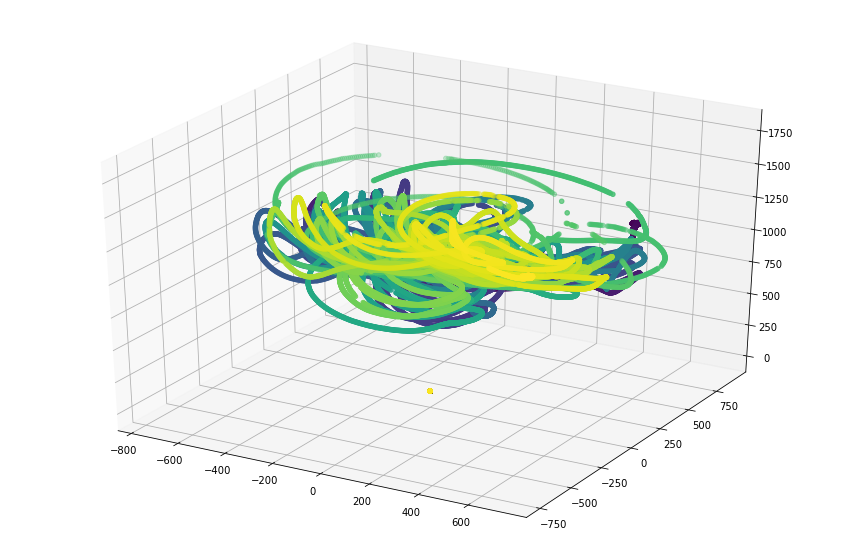

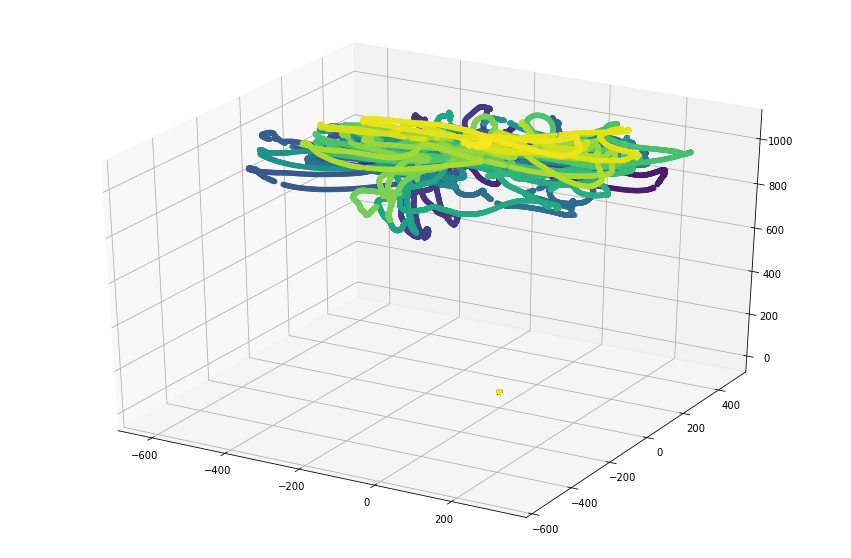

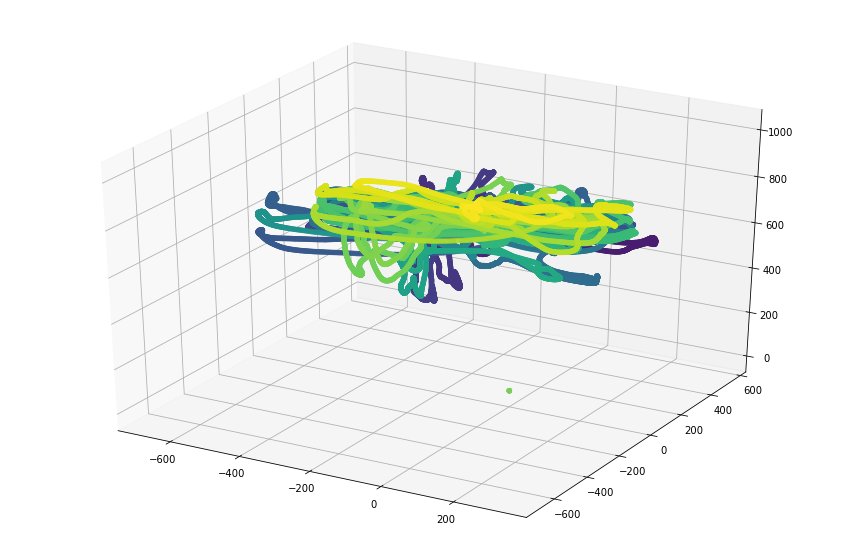

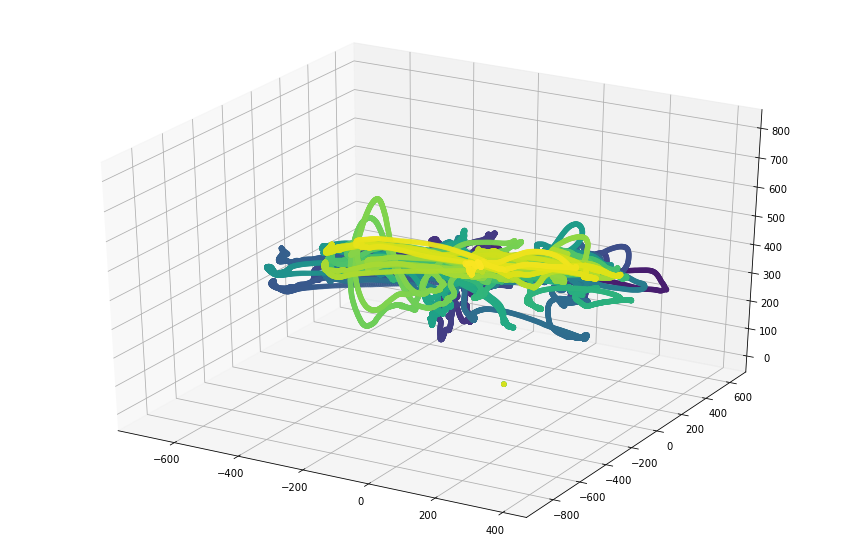

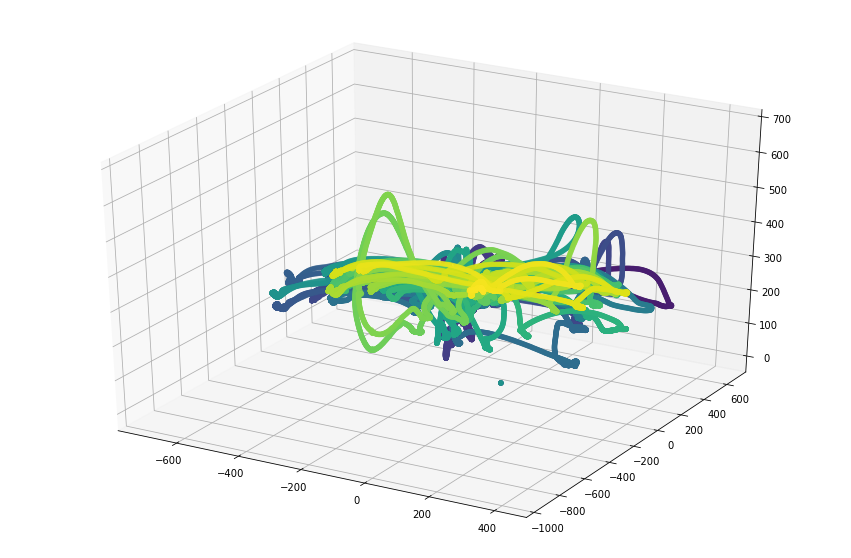

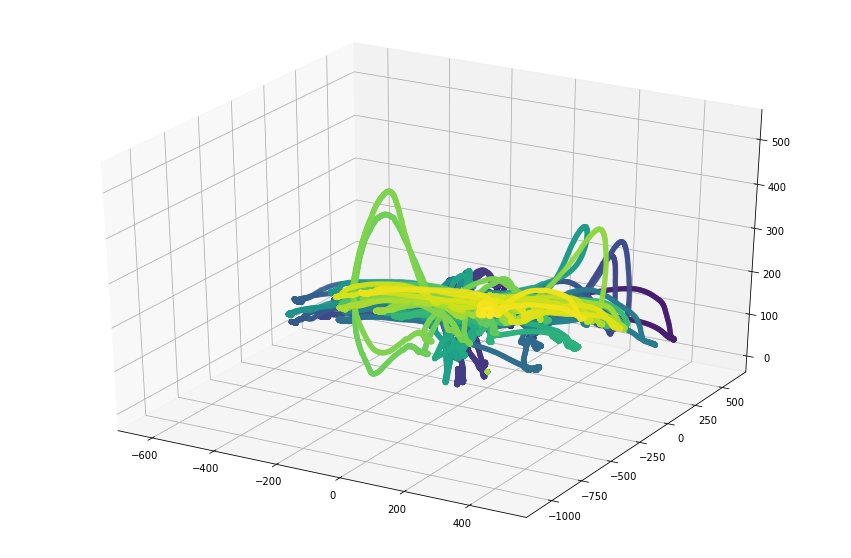

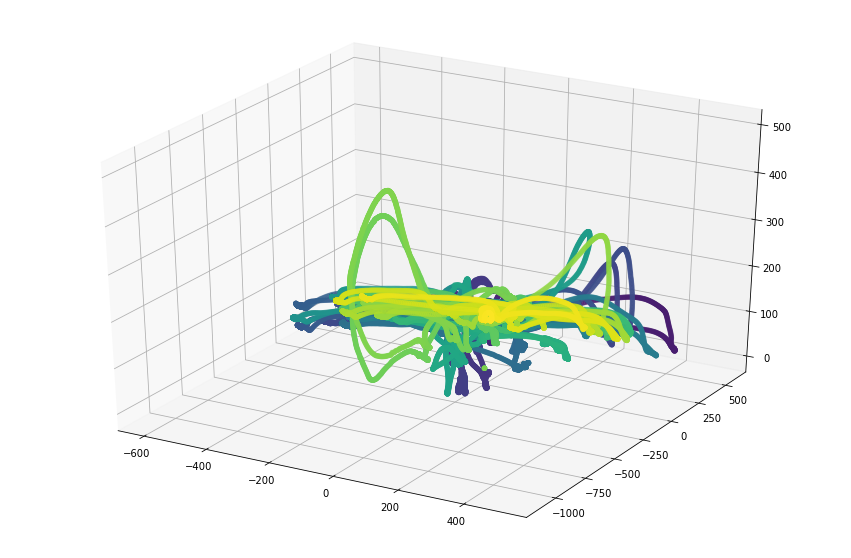

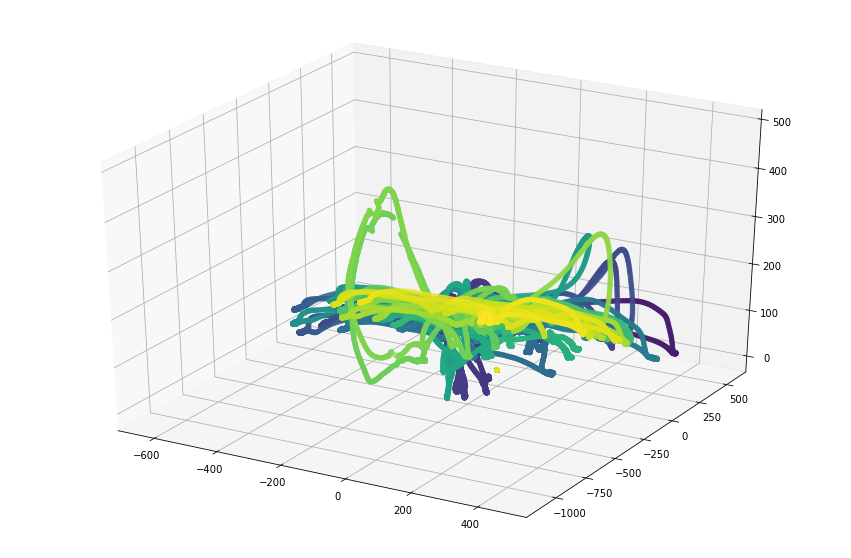

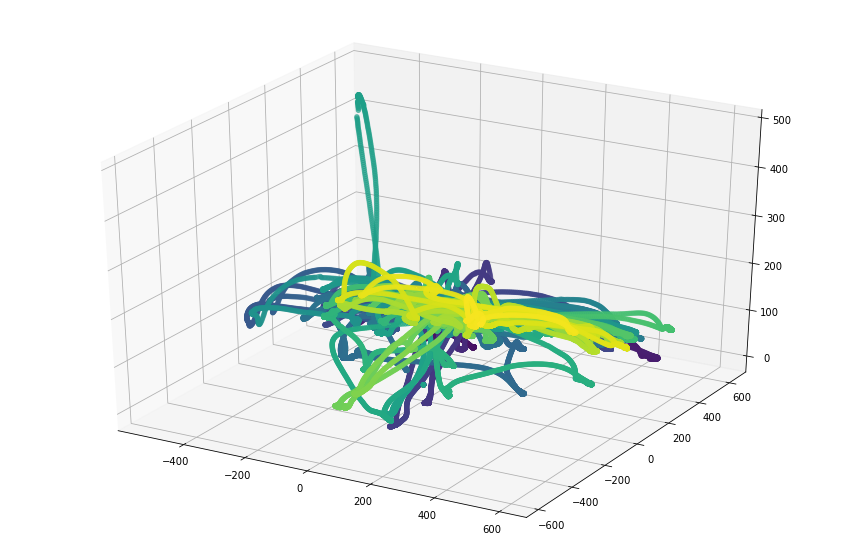

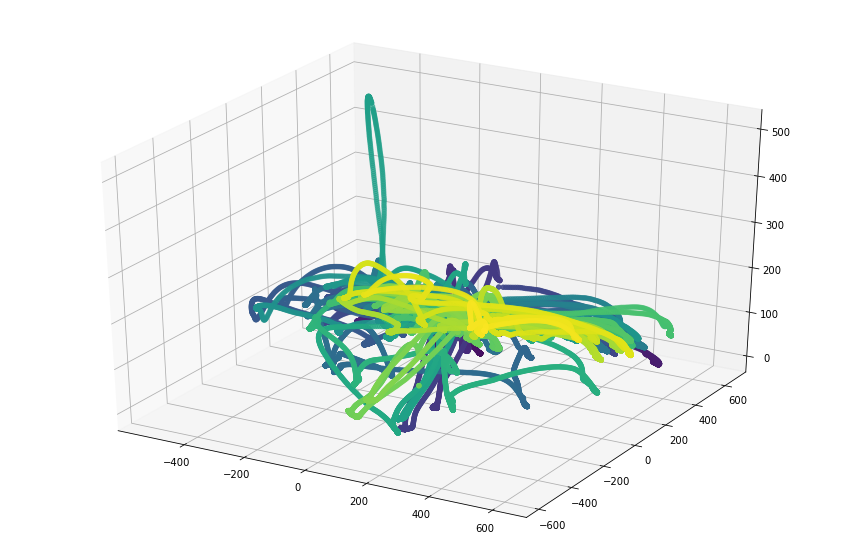

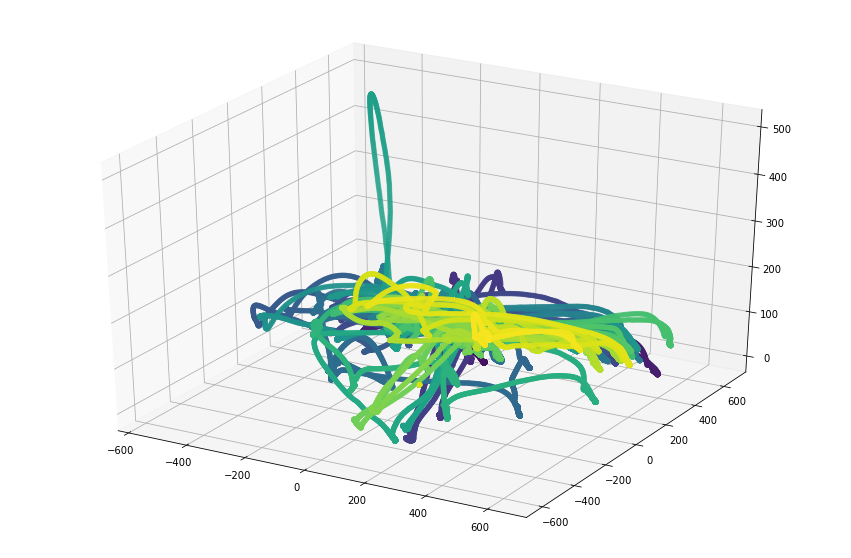

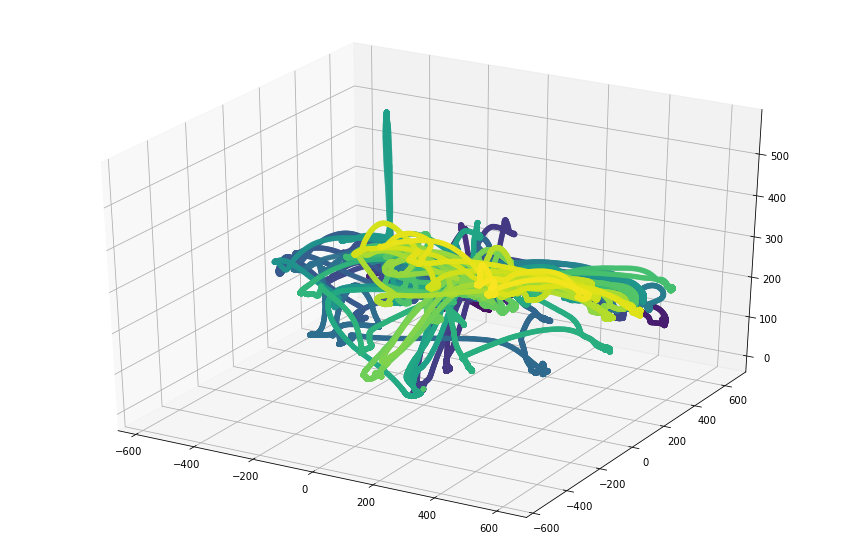

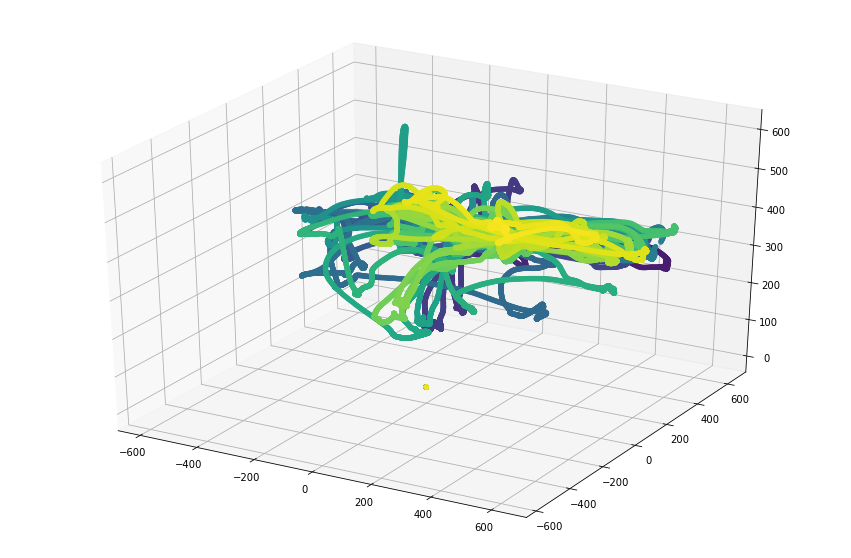

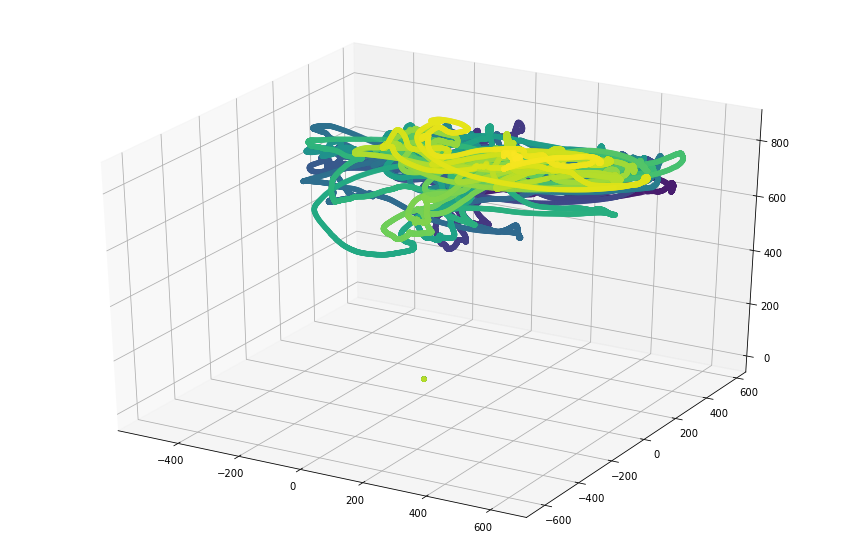

In [25]:
for i in range(37):
    plot_movement('Stefanos_Bachata-01.c3d', i)

Let's try to visualize one frame, but all the points at once this time.

In [22]:
first_frame = df['Points'][0]

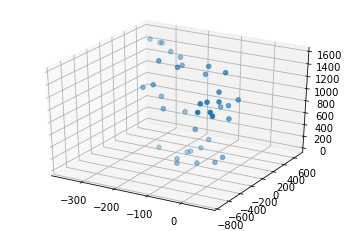

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(first_frame[:,0], first_frame[:,1], first_frame[:,2])

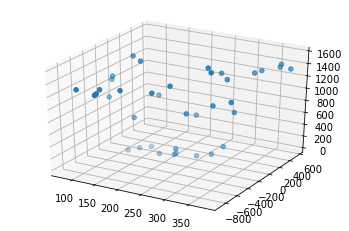

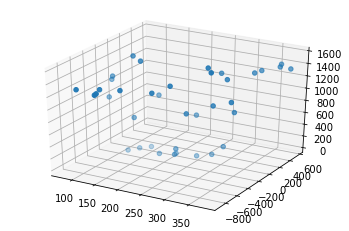

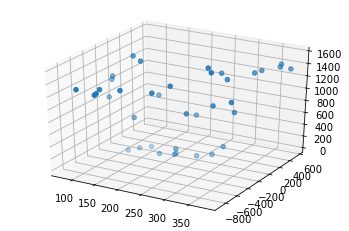

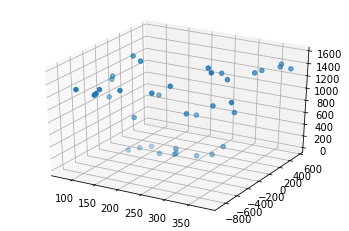

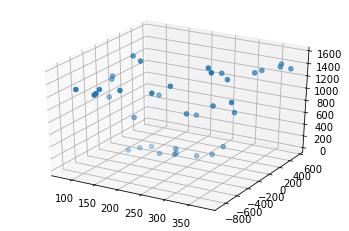

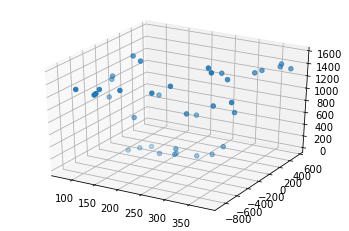

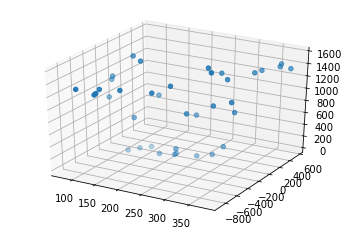

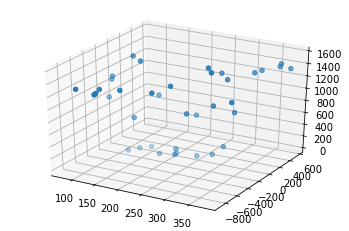

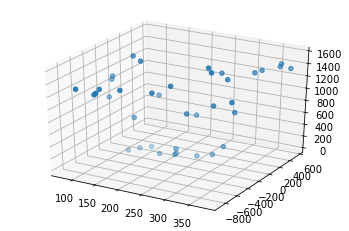

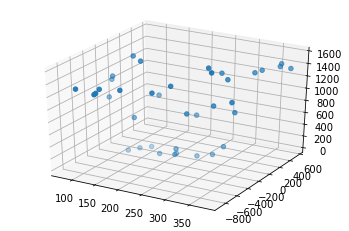

In [36]:
for i in range(5000, 5010):
    f = df['Points'][i]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(f[:,0], f[:,1], f[:,2])